In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [43]:
pd.set_option('display.max_columns', 500)

data = pd.read_csv('data.csv')
data.head(1)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


C:\Users\heady\AppData\Local\Temp\ipykernel_22524\3267924569.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


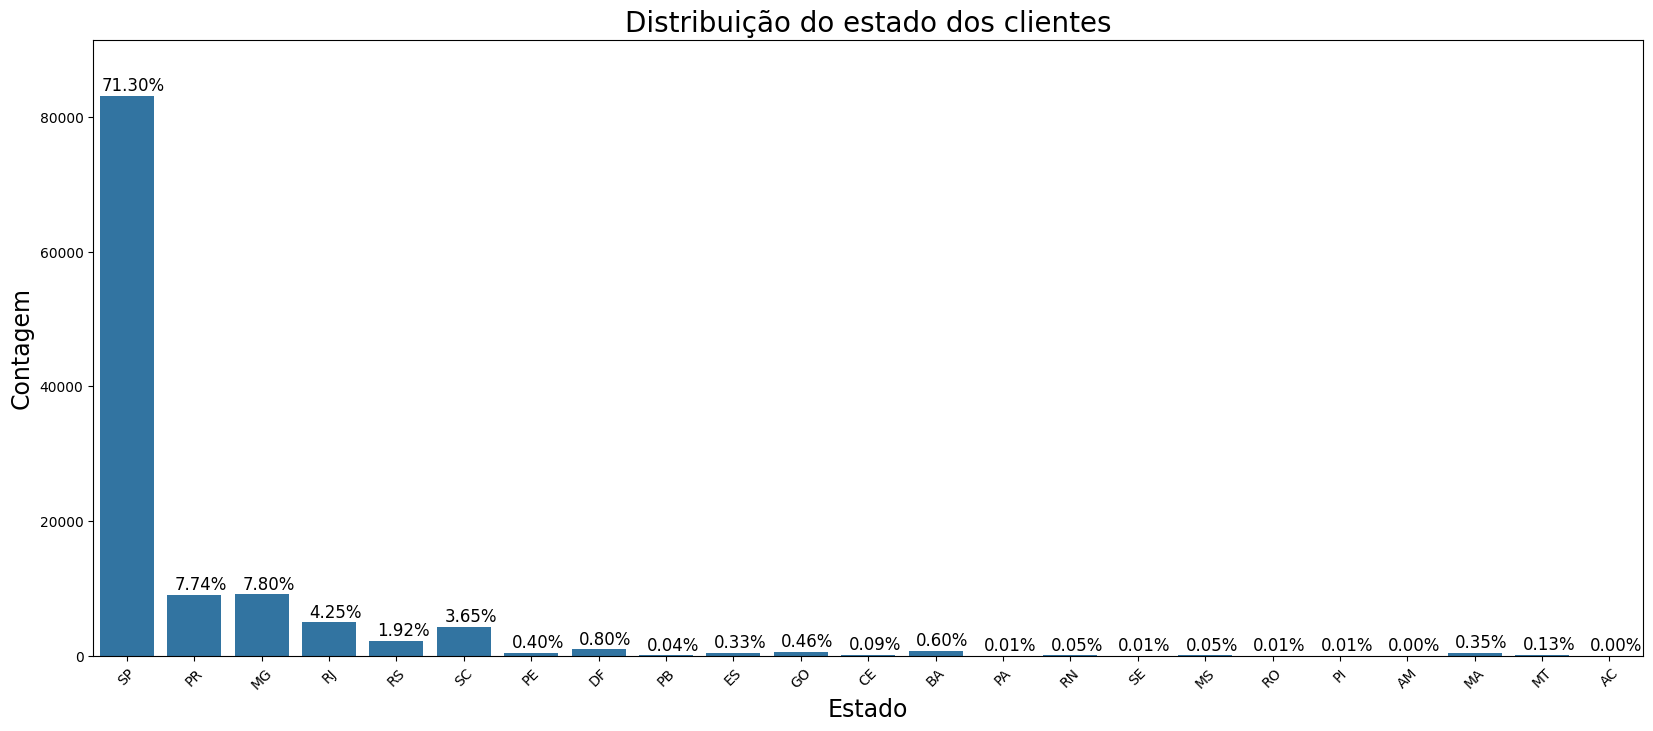

In [44]:
def plot_porcentagem(column, dataset):
    
    plt.figure(figsize=(20,8))
    g = sns.countplot(x=column, data=dataset, orient='h')
    g.set_title("Distribuição do estado dos clientes", fontsize=20)
    g.set_xlabel("Estado", fontsize=17)
    g.set_ylabel("Contagem", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/1.6,
            height + 200,
            '{:1.2f}%'.format(height/116581*100),
            ha="center", va='bottom',fontsize=12) 
    g.set_ylim(0, max(sizes) * 1.1)

plot_porcentagem('estado_vendedor', data)

> ## Recência (R)
> #### Há quantos dias foi a última compra desse cliente?

> ## Frequência (F)
> #### Quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?

> ## Monetaridade (M)
> #### Quanto esse cliente já gastou em dinheiro na sua empresa?

### Recencia

In [45]:
purchases = data[["id_cliente", "id_unico_cliente", "horario_pedido", "item_id", "preco"]]
purchases.head()

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,1,112.99
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,2,112.99
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,1,124.99
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,1,106.99


In [46]:
last_purchases = data.groupby("id_unico_cliente")["horario_pedido"].max().reset_index()
last_purchases.columns = ["id_unico_cliente", "last_purchase_date"]

last_purchases["last_purchase_date"] = pd.to_datetime(last_purchases["last_purchase_date"])
last_purchases["recency"] = (last_purchases["last_purchase_date"].max() - last_purchases["last_purchase_date"]).dt.days

last_purchases.head(2)

,id_unico_cliente,last_purchase_date,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118


In [47]:
purchases = pd.merge(purchases, last_purchases, on="id_unico_cliente")
purchases.head(5)

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco,last_purchase_date,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,1,112.99,2017-11-09 00:50:13,298
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,2,112.99,2017-11-09 00:50:13,298
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,1,124.99,2017-05-07 20:11:26,483
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,1,106.99,2018-02-03 19:45:40,211


### Frequencia

In [48]:
frequencia = data.groupby("id_unico_cliente")["pedido_aprovado"].count().reset_index()
frequencia.columns = ["id_unico_cliente", "frequency"]

purchases = pd.merge(purchases, frequencia, on="id_unico_cliente")

### Receita

In [49]:
receita = data.groupby("id_unico_cliente")["pagamento_valor"].sum().reset_index()
receita.columns = ["id_unico_cliente", "monetary_value"]

purchases = pd.merge(purchases, receita, on="id_unico_cliente")
purchases.head(1)

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco,last_purchase_date,recency,frequency,monetary_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87


## Calcular Clusters

> Agora precisamos usar o Método Cotovelo, a ideia é rodar o KMeans para várias quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters. Usando a "regra do cotovelo", identificamos que a partir de 4 clusters teremos bons resultados. Vou usar 5 apenas para garantir.

> O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [50]:
from sklearn.cluster import KMeans
import math

### Definindo N de Clusters

In [51]:
def definir_wcss(data, n_clusters):
    wcss = []
    for i in range(n_clusters):
        km = KMeans(n_clusters=i+1, init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(data)
        wcss.append(km.inertia_)

    return wcss

In [52]:
def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20,wcss[len(wcss)-1]
    
    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [53]:
wcss = definir_wcss(purchases[["monetary_value"]], 10)
numero_otimo_clusters(wcss)

6

### Clusterizando

In [54]:
def ordenador_cluster(cluster_nome, order_by, dataframe, ascending):
    media_cluster = dataframe.groupby(cluster_nome)[order_by].mean().reset_index()
    
    media_cluster_ordenado = media_cluster.sort_values(by=order_by, ascending=ascending).reset_index(drop=True)

    media_cluster_ordenado['index'] = media_cluster.index

    juntando_cluster = pd.merge(dataframe, media_cluster_ordenado[[cluster_nome,'index']],on=cluster_nome)

    removendo_dandos = juntando_cluster.drop([cluster_nome],axis=1)
    
    updated = removendo_dandos.rename(columns={'index':cluster_nome})
    return updated

In [55]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
purchases["recency_cluster"] = kmeans.fit_predict(purchases[["recency"]])

purchases = ordenador_cluster('recency_cluster', 'recency', purchases, False)
purchases.head(1)

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco,last_purchase_date,recency,frequency,monetary_value,recency_cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0


In [56]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
purchases["frequency_cluster"] = kmeans.fit_predict(purchases[["frequency"]])

purchases = ordenador_cluster('frequency_cluster', 'frequency', purchases, True)
purchases.head(1)

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco,last_purchase_date,recency,frequency,monetary_value,recency_cluster,frequency_cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0,0


In [57]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
purchases["monetary_cluster"] = kmeans.fit_predict(purchases[["monetary_value"]])

purchases = ordenador_cluster('monetary_cluster', 'monetary_value', purchases, True)
purchases.head(1)

,id_cliente,id_unico_cliente,horario_pedido,item_id,preco,last_purchase_date,recency,frequency,monetary_value,recency_cluster,frequency_cluster,monetary_cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1,124.99,2017-05-16 15:05:35,474,1,146.87,0,0,0


In [58]:
purchases.groupby("monetary_cluster")["monetary_value"].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,110259.0,199.192765,202.601246,9.59,68.13,125.97,240.10,1105.92
1,5352.0,2007.800364,853.149979,1106.52,1339.69,1731.60,2412.68,4663.44
2,718.0,7346.290042,2146.558929,4681.78,5583.78,6907.05,8530.14,12834.50
3,198.0,20224.831111,5020.538787,14196.28,16313.60,19167.26,25051.89,30186.00
4,46.0,43587.292174,2837.177072,36489.24,44048.00,44048.00,45256.00,45256.00
5,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


## Pontuação

In [75]:
users = purchases[["id_unico_cliente", "recency", "frequency", "monetary_value", "recency_cluster", "frequency_cluster", "monetary_cluster"]]
users["score"] = users["recency_cluster"] + users["frequency_cluster"] + users["monetary_cluster"]

users["segment"] = "Inactive"
users.loc[users["score"] >= 2,"segment"] = "Business"
users.loc[users["score"] >= 4,"segment"] = "Master"
users.loc[users["score"] >= 6,"segment"] = "Premium"

users.drop_duplicates(subset=['id_unico_cliente'], keep="first", inplace=True)

C:\Users\heady\AppData\Local\Temp\ipykernel_22524\3526252543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["score"] = users["recency_cluster"] + users["frequency_cluster"] + users["monetary_cluster"]
C:\Users\heady\AppData\Local\Temp\ipykernel_22524\3526252543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["segment"] = "Inactive"
C:\Users\heady\AppData\Local\Temp\ipykernel_22524\3526252543.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [76]:
def plot_segmento(x, y, dataset):
    plt.figure(figsize=(7,5))
    g = sns.scatterplot(x=x, y=y, data=dataset, hue="segment", palette="Set1")
    g.set_title("Distribuição dos segmentos", fontsize=20)
    g.set_xlabel(x, fontsize=17)
    g.set_ylabel(y, fontsize=17)
    plt.show()

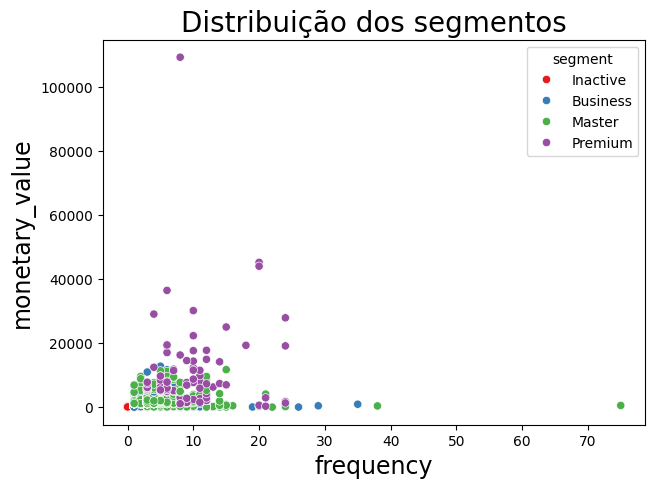

In [77]:
plot_segmento("frequency", "monetary_value", users)

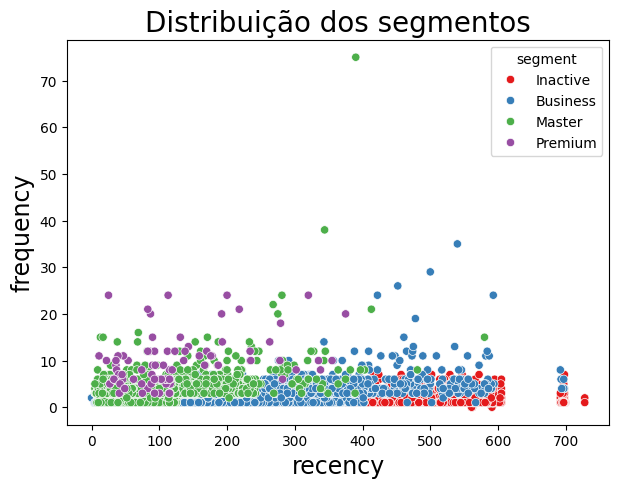

In [78]:
plot_segmento("recency", "frequency", users)

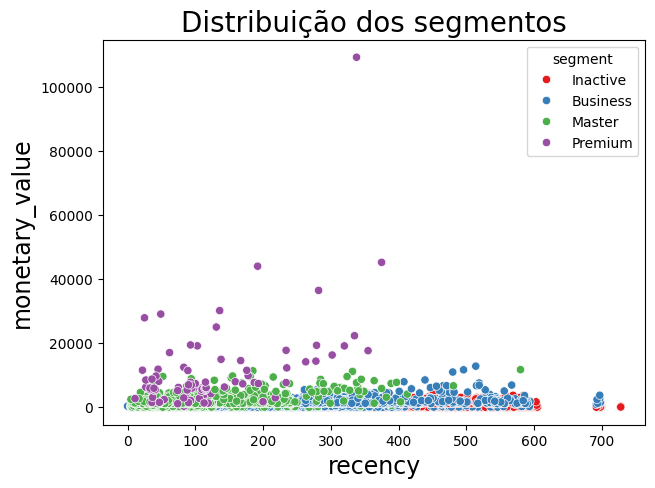

In [79]:
plot_segmento("recency", "monetary_value", users)

C:\Users\heady\AppData\Local\Temp\ipykernel_22524\2132485553.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="segment", data=users, palette="Set1")


<Axes: xlabel='segment', ylabel='count'>

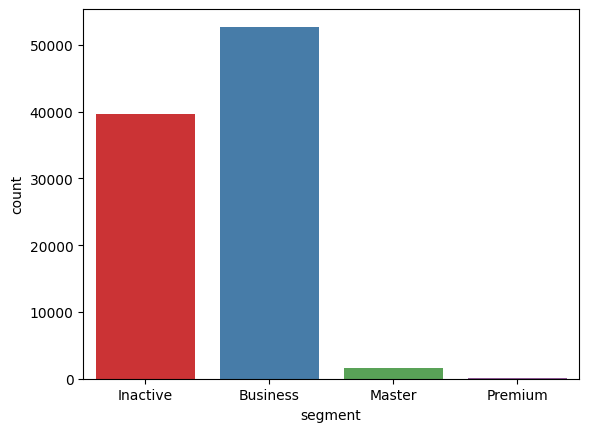

In [66]:
sns.countplot(x="segment", data=users, palette="Set1")

In [81]:
users.to_csv('users.csv')